In [92]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
ride_data_to_load = "data/ride_data.csv"
city_data_to_load = "data/city_data.csv"


# Read the City and Ride Data
ride_df = pd.read_csv(ride_data_to_load)
city_df = pd.read_csv(city_data_to_load)


# Combine the data into a single dataset
merge_df = pd.merge(ride_df, city_df, on="city",how="left")

# Display the data table for preview
merge_df.head()
# merge_df.to_excel("output.xlsx") 

## Bubble Plot of Ride Sharing Data

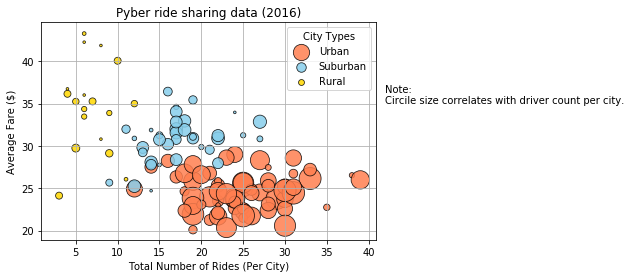

In [73]:
# Obtain the x and y coordinates for each of the three city types
urban = merge_df.loc[merge_df['type']=='Urban'].groupby('city')
suburban = merge_df.loc[merge_df['type']=='Suburban'].groupby('city')
rural = merge_df.loc[merge_df['type']=='Rural'].groupby('city')

u_mean = urban['fare'].mean()
s_mean = suburban['fare'].mean()
r_mean = rural['fare'].mean()

u_count = urban['fare'].count()
s_count = suburban['fare'].count()
r_count = rural['fare'].count()

u_driver = urban['driver_count'].mean()
s_driver = suburban['driver_count'].mean()
r_driver = rural['driver_count'].mean()

x = u_count 
y = u_mean
x2 =s_count 
y2 = s_mean 
x3 = r_count 
y3 = r_mean 


# Build the scatter plots for each city types
fig = plt.figure()
ax = plt.subplot()
colors = ['Coral',  'SkyBlue','Gold'  ]

ax.scatter(x, y, s=u_driver*7, marker="o" ,  edgecolors="black", c=colors[0], alpha =0.85, label='Urban',linewidth=[0.79])
ax.scatter(x2, y2, s=s_driver*7, marker="o",  edgecolors="black", c=colors[1] , alpha =0.85, label='Suburban',linewidth=[0.79])
ax.scatter(x3, y3, s=r_driver*7, marker="o",edgecolors="black",c=colors[2] , alpha =0.85, label='Rural',linewidth=[0.79])

# Incorporate the other graph properties
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber ride sharing data (2016)')
plt.grid()

# Create a legend
plt.legend(title="City Types", fancybox=True)

# Incorporate a text label regarding circle size
t = f'Note:\nCircile size correlates with driver count per city.'
plt.text(42, 35, t, ha='left',  wrap=True)

# Save Figure
plt.savefig('Pyber.png')


In [24]:
# Show plot
plt.show()

## Total Fares by City Type

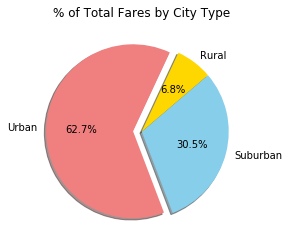

In [90]:
# # Calculate Type Percents
u=merge_df.loc[merge_df['type']=='Urban']
s=merge_df.loc[merge_df['type']=='Suburban']
r=merge_df.loc[merge_df['type']=='Rural']

# Labels for the sections of our pie chart
labels = ['Urban','Suburban','Rural']

# The values of each section of the pie chart
sizes = [u['fare'].sum(), s['fare'].sum(), r['fare'].sum()]

# The colors of each section of the pie chart
colors = ['lightCoral',  'SkyBlue','Gold'  ]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# Build Pie Chart
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=65)
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig('Pyber2.png')

In [46]:
# Show Figure
plt.show()

## Total Rides by City Type

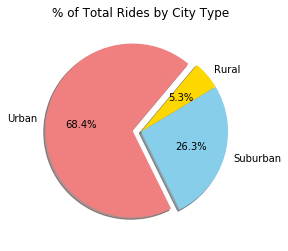

In [81]:
# Calculate Ride Percents

u=merge_df.loc[merge_df['type']=='Urban']
s=merge_df.loc[merge_df['type']=='Suburban']
r=merge_df.loc[merge_df['type']=='Rural']

# Labels for the sections of our pie chart
labels = ['Urban','Suburban','Rural']

# The values of each section of the pie chart
sizes = [u['fare'].count(), s['fare'].count(), r['fare'].count()]

# The colors of each section of the pie chart
colors = ['lightCoral',  'SkyBlue','Gold'  ]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# Build Pie Chart
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=50)
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig('Pyber3.png')

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

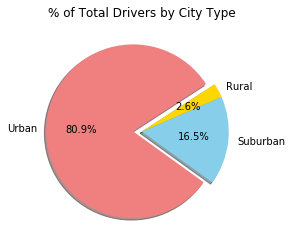

In [89]:
# Calculate Driver Percents
u=city_df.loc[city_df['type']=='Urban']
s=city_df.loc[city_df['type']=='Suburban']
r=city_df.loc[city_df['type']=='Rural']

# Labels for the sections of our pie chart
labels = ['Urban','Suburban','Rural']

# The values of each section of the pie chart
sizes = [u['driver_count'].sum(), s['driver_count'].sum(),r['driver_count'].sum() ]

# The colors of each section of the pie chart
colors = ['lightCoral',  'SkyBlue','Gold'  ]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# Build Pie Chart
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=33)
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig('Pyber4.png')

In [ ]:
# Show Figure
plt.show()

# Three observable trends based on the data

## 1
```The more urbanized a city is, the larger its Pyber driver population is.``` Of course urban areas have the **most number** of both drives, surburban areas the second and the rural regions the last. 

## 2
```Same rule applies in the number of rides for the three city types. ```Urban areas not only have the **most number** of drives it represents the **most number** of rides taking place for the Pyber service. 

## 3 
Even though suburban cities have comparably fewer drivers and fewer rides than urban regions, however average fares per ride are more important than urban rides. This **reverse relationship** between the _city's urbanization level_ and _average fare per ride_ is even more obvious when we examine the rural areas' data vs. the other two types of cities. Thus we can say ```the more offering of Pyber ride sharing service, the lower average revenue per ride. ```
